# Introdução

A análise abaixo foi feita utlizando os dados fornecidos pela equipe de engenharia de dados durante o desafio da Petlove.<br>

O problema é referente a perda de qualquer usuário que assinou o serviço de
assinatura da Petlove e o **cancelou** em algum momento após a contratação. <br>
Ao analisar os dados dos últimos meses, apesar de todas as melhorias de
usabilidade da plataforma, o churn vem aumentando.<br>

Pontos principais da Análise:
- Ressaltar os aprendizados da análise dos dados.
- Sugestão para os próximos passos.

## Carregando Bibliotecas

In [704]:
# bibliotecas para manipulacao dos dados
import pandas as pd
import numpy as np
import sidetable as stb
import datetime as dt

# bibiliotecas para visualizacao 
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo das visualizacoes
sns.set()
pd.options.display.max_columns = 500
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = [10, 5]

**ALERTA:** importante que tenha as bibliotecas baixadas em sua máquina (<i>pandas, seaborn, sidetable, sweetviz</i>), caso não tenha instalado em sua máquina as seguintes bibliotecas é só descomentar os scripts abaixo e rodar a célula.

In [705]:
# !pip install pandas
# !pip install seaborn
# !pip install sidetable

# Carregando o Dataset

In [706]:
df = pd.read_csv('./data/data-test-analytics.csv')

### Visualizando o Dataset

In [707]:
df.head()

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,Santa Isabel,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,03/07/19 11:46 PM,01/07/21 11:23 AM,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,Estrela,01/07/21 11:23 AM,211.955597,13,2331.511572,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,07/21/18 10:17 AM,01/10/21 11:23 AM,NaN,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,11/21/80 12:00 AM,active,3.34.3,Campos do Campo,PE,Confisco,01/10/21 11:23 AM,204.113227,8,1224.679359,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,06/08/18 12:09 PM,01/18/21 11:23 AM,NaN,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,07/07/59 12:00 AM,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,01/18/21 11:23 AM,252.940997,9,2023.527980,8,31,crm


### Verificando Valores Nulos e o Tipo de Dados

In [708]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10000 non-null  object 
 1   created_at          10000 non-null  object 
 2   updated_at          10000 non-null  object 
 3   deleted_at          505 non-null    object 
 4   name_hash           10000 non-null  object 
 5   email_hash          10000 non-null  object 
 6   address_hash        10000 non-null  object 
 7   birth_date          10000 non-null  object 
 8   status              10000 non-null  object 
 9   version             10000 non-null  object 
 10  city                10000 non-null  object 
 11  state               10000 non-null  object 
 12  neighborhood        10000 non-null  object 
 13  last_date_purchase  10000 non-null  object 
 14  average_ticket      10000 non-null  float64
 15  items_quantity      10000 non-null  int64  
 16  all_r

Nosso dataset é composto por 10000 entradas (linhas) e 20 variáveis(colunas).

In [709]:
df.isna().sum()

id                       0
created_at               0
updated_at               0
deleted_at            9495
name_hash                0
email_hash               0
address_hash             0
birth_date               0
status                   0
version                  0
city                     0
state                    0
neighborhood             0
last_date_purchase       0
average_ticket           0
items_quantity           0
all_revenue              0
all_orders               0
recency                  0
marketing_source         0
dtype: int64

Vemos aqui que só existem valores nulos na coluna 'deleted_at', com 9495 valores nulos.

### Variáveis numéricas


In [710]:
df.describe()

,average_ticket,items_quantity,all_revenue,all_orders,recency
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,216.894709,8.49980,1174.888603,5.415400,67.192900
std,22.757213,3.02604,763.141973,3.457577,175.723276
min,131.378672,1.00000,0.000000,0.000000,1.000000
25%,201.398851,6.00000,494.873564,2.000000,31.000000
50%,217.019478,8.00000,1172.751918,5.000000,35.000000
75%,232.455042,11.00000,1798.475045,8.000000,39.000000
max,303.386848,19.00000,3225.654163,11.000000,1820.000000


# Transformando os Dados

##### Deletando as Colunas que não usaremos durante a Análise

In [711]:
df.drop(columns=['name_hash', 'email_hash', 'address_hash',], inplace=True)

As colunas citadas acima são criptografadas e por isso não servirão para a nossa análise;


### Criando Coluna de Churn

In [712]:
# Funcao que verifica o status do cliente para a criacao da coluna churn

def get_churn(value):
    if value == 'canceled':
        return 'Yes'
    else:
        return 'No'

In [713]:
# aplicado a funcao get_churn na coluna status

df['churn'] = df['status'].apply(get_churn)

In [714]:
# verificando a coluna churn

df[(df['status'] == 'paused') | (df['status'] == 'canceled')].head(2)

,id,created_at,updated_at,deleted_at,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source,churn
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,Santa Isabel,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search,No
12,9e755f27-01e7-4e2f-aaba-18f733f3e3d9,12/06/16 08:43 PM,06/17/18 11:59 PM,06/17/18 11:59 PM,01/25/66 12:00 AM,canceled,5.31.5,Moreira do Galho,AP,Ipe,07/13/17 06:36 AM,190.017737,9,1140.106424,6,1316,crm,Yes


### Criando coluna de duração de assinatura em Meses

#### Faremos essa ação em algumas etapas:
1. Criaremos uma lista com as colunas que queremos formatar
2. Transformamos as colunas no tipo datetime
3. Calculamos a diferença de datas entre as colunas **created_at** e **deleted-at**, depois multiplicamos pela quantidade de meses no ano e por fim subtraímos pela diferença de meses dessas mesma coluna

##### Formatando as Colunas que contém Datas

In [715]:
# Lista de colunas que serao formatadas

list_date_cols = ['created_at', 'updated_at', 'deleted_at', 'last_date_purchase']

In [716]:
# Loop de formatação de datas sobre a lista criada

for col in list_date_cols:
    df[col] = pd.to_datetime(df[col], format='%m/%d/%y %I:%M %p')

verificando se os tipos foram alterados com sucesso:

In [717]:
df.dtypes

id                            object
created_at            datetime64[ns]
updated_at            datetime64[ns]
deleted_at            datetime64[ns]
birth_date                    object
status                        object
version                       object
city                          object
state                         object
neighborhood                  object
last_date_purchase    datetime64[ns]
average_ticket               float64
items_quantity                 int64
all_revenue                  float64
all_orders                     int64
recency                        int64
marketing_source              object
churn                         object
dtype: object

In [718]:
df.head(1)

,id,created_at,updated_at,deleted_at,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source,churn
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,2017-08-15 07:05:00,2021-01-14 11:23:00,NaT,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:00,151.142942,10,906.857651,6,35,crm,No


A coluna 'duration_months' é uma coluna que possui o valor de duração de assinatura do cliente em meses

In [719]:
# Calcula a duração em meses para clientes cancelados
df.loc[df['status'] == 'canceled', 'duration_months'] = (
    (df['deleted_at'].dt.year - df['created_at'].dt.year) * 12 
    + (df['deleted_at'].dt.month - df['created_at'].dt.month))

# Calcula a duração em meses para clientes ativos
df.loc[df['status'] == 'active', 'duration_months'] = (
    (pd.to_datetime('now').year - df.loc[df['status'] == 'active', 'created_at'].dt.year) * 12 
    + (pd.to_datetime('now').month - df.loc[df['status'] == 'active', 'created_at'].dt.month))

# Atribui NaN para clientes pausados
df.loc[df['status'] == 'paused', 'duration_months'] = np.nan

In [720]:
df[df['status']=='canceled'].head(1)

,id,created_at,updated_at,deleted_at,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source,churn,duration_months
12,9e755f27-01e7-4e2f-aaba-18f733f3e3d9,2016-12-06 20:43:00,2018-06-17 23:59:00,2018-06-17 23:59:00,01/25/66 12:00 AM,canceled,5.31.5,Moreira do Galho,AP,Ipe,2017-07-13 06:36:00,190.017737,9,1140.106424,6,1316,crm,Yes,18.0


In [721]:
df[df['status']=='active'].head(1)

,id,created_at,updated_at,deleted_at,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source,churn,duration_months
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,2017-08-15 07:05:00,2021-01-14 11:23:00,NaT,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:00,151.142942,10,906.857651,6,35,crm,No,69.0


#### Criando função para separar em faixas o tempo de Assinatura

In [722]:
# Valor maximo de duracao de meses de clientes com status de cancelado
df['duration_months'].max()

87.0

In [723]:
# Valor minimo de duracao de meses de clientes com status de cancelado
df['duration_months'].min()

0.0

In [724]:
# criando uma funcao para classificacao por faixa temporal
def set_month_category(num_months):
    if num_months in range(0, 13):
        return 'Tenure_0-12'
    elif num_months in range(13, 25):
        return 'Tenure_13-24'
    elif num_months in range(25, 49):
        return 'Tenure_25-48'
    elif num_months in range(49, 61):
        return 'Tenure_49-60'
    elif num_months in range(61, 72):
        return 'Tenure_61-72'
    elif num_months > 72:
        return 'Tenure_72+'
    elif num_months == np.nan:
        return np.nan

In [725]:
# criando uma nova coluna com os valores por faixa

df['duration_group'] = df['duration_months'].apply(set_month_category)

In [726]:
df[df['duration_group'] == 'Tenure_0-12']

,id,created_at,updated_at,deleted_at,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source,churn,duration_months,duration_group
33,9e51382b-e7dc-4430-9d04-f39b36d25cf6,2020-09-02 18:53:00,2021-02-14 18:19:00,2021-02-14 18:19:00,11/08/75 12:00 AM,canceled,4.22.8,Almeida,MS,Conjunto Floramar,2020-12-24 06:42:00,215.223848,10,1076.119241,5,56,organic_search,Yes,5.0,Tenure_0-12
86,ab77fb95-a328-4bdd-869d-a7353f6bb2f3,2020-11-25 08:12:00,2020-12-08 06:45:00,2020-12-08 06:45:00,08/11/49 12:00 AM,canceled,4.32.5,Almeida Alegre,SE,São Jorge 2ª Seção,2020-11-27 21:42:00,214.151632,15,0.000000,0,82,direct,Yes,1.0,Tenure_0-12
143,bd09e4ed-074f-411a-b67d-ec14c881faa2,2019-10-17 18:40:00,2020-05-22 00:24:00,2020-05-22 00:24:00,01/29/77 12:00 AM,canceled,3.8.8,Cavalcanti do Amparo,RS,Penha,2020-03-30 15:50:00,244.260453,9,1709.823173,7,324,telegram_whatsapp,Yes,7.0,Tenure_0-12
211,a8a9cab4-8fd3-4d26-9335-fbfd32ac67af,2016-02-21 13:04:00,2016-06-21 10:18:00,2016-06-21 10:18:00,01/23/75 12:00 AM,canceled,3.45.5,Pinto do Oeste,SC,Nova Floresta,2016-04-04 12:29:00,235.796856,9,707.390568,3,1780,crm,Yes,4.0,Tenure_0-12
234,38569898-1c5e-49db-9f09-18f11a4992cd,2019-03-15 16:58:00,2019-05-14 10:13:00,2019-05-14 10:13:00,11/26/52 12:00 AM,canceled,4.34.8,Vieira Verde,PR,Solar Do Barreiro,2019-05-01 03:43:00,220.626381,4,220.626381,1,659,paid_search,Yes,2.0,Tenure_0-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9775,15df9c0a-8826-40f2-9e98-fdc253c994dc,2019-11-30 16:49:00,2020-09-19 15:08:00,2020-09-19 15:08:00,09/10/66 12:00 AM,canceled,5.31.4,Dias,RS,Santa Amelia,2019-12-31 23:04:00,211.002862,12,1899.025755,9,414,organic_search,Yes,10.0,Tenure_0-12
9817,1a599fde-745e-4aaa-ae68-61f3773effc2,2020-11-27 14:17:00,2020-12-01 21:45:00,2020-12-01 21:45:00,08/28/56 12:00 AM,canceled,4.37.3,Ribeiro,RR,Granja Werneck,2020-11-28 08:34:00,183.850017,9,0.000000,0,82,crm,Yes,1.0,Tenure_0-12
9927,dd1739ce-40b9-442a-83a5-be534559eabb,2018-12-23 14:02:00,2019-07-26 12:01:00,2019-07-26 12:01:00,02/01/60 12:00 AM,canceled,5.17.8,das Neves,GO,Calafate,2019-02-08 23:07:00,233.283850,3,1632.986947,7,740,none,Yes,7.0,Tenure_0-12
9945,07e9a614-251d-4b42-b82a-bfc5ce71ec8c,2021-02-04 22:59:00,2021-02-16 12:45:00,2021-02-16 12:45:00,04/30/82 12:00 AM,canceled,4.6.4,Gomes do Sul,BA,Apolonia,2021-02-15 21:55:00,231.366753,11,0.000000,0,2,telegram_whatsapp,Yes,0.0,Tenure_0-12


Verificando se a coluna foi criada adequadamente

In [727]:
df.head(5)

,id,created_at,updated_at,deleted_at,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source,churn,duration_months,duration_group
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,2017-08-15 07:05:00,2021-01-14 11:23:00,NaT,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:00,151.142942,10,906.857651,6,35,crm,No,69.0,Tenure_61-72
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,2019-12-31 21:53:00,2021-01-08 11:23:00,NaT,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,Santa Isabel,2021-01-08 11:23:00,236.991790,4,236.991790,1,41,organic_search,No,NaN,None
2,dc067cd2-c021-42bd-8c0e-beb267280e66,2019-03-07 23:46:00,2021-01-07 11:23:00,NaT,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,Estrela,2021-01-07 11:23:00,211.955597,13,2331.511572,11,42,organic_search,No,50.0,Tenure_49-60
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,2018-07-21 10:17:00,2021-01-10 11:23:00,NaT,11/21/80 12:00 AM,active,3.34.3,Campos do Campo,PE,Confisco,2021-01-10 11:23:00,204.113227,8,1224.679359,6,39,organic_search,No,58.0,Tenure_49-60
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,2018-06-08 12:09:00,2021-01-18 11:23:00,NaT,07/07/59 12:00 AM,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,2021-01-18 11:23:00,252.940997,9,2023.527980,8,31,crm,No,59.0,Tenure_49-60


### Criando um para Usarmos no Power BI

In [728]:
# Copiando o dataset

df_powerbi = df.copy()

#### Arredondando Valores de Colunas relacionadas com preço

In [729]:
# Lista de colunas que serao formatadas para a melhor visualização dos dados

list_col_values = ['all_revenue', 'average_ticket']

In [730]:
# Loop de formatação de valores sobre a lista criada (list_col_values)

for col in list_col_values:
    df_powerbi[col] = df_powerbi[col].round(2)
    df_powerbi[col] = df_powerbi[col].astype(str).str.replace('.', ',')

#### Formatando as Datas

In [731]:
# Loop de formatação de datas sobre a lista criada (list_date_cols)

for col in list_date_cols:
    df_powerbi[col] = df_powerbi[col].dt.strftime('%d/%m/%y %I:%M %p')   

Verificando se os valores das colunas foram modificados adequadamente

In [732]:
df_powerbi.head(1)

,id,created_at,updated_at,deleted_at,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source,churn,duration_months,duration_group
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,15/08/17 07:05 AM,14/01/21 11:23 AM,NaN,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,14/01/21 11:23 AM,"151,14",10,"906,86",6,35,crm,No,69.0,Tenure_61-72


In [733]:
df_powerbi.dtypes

id                     object
created_at             object
updated_at             object
deleted_at             object
birth_date             object
status                 object
version                object
city                   object
state                  object
neighborhood           object
last_date_purchase     object
average_ticket         object
items_quantity          int64
all_revenue            object
all_orders              int64
recency                 int64
marketing_source       object
churn                  object
duration_months       float64
duration_group         object
dtype: object

#### Exportando o Arquivo

Exportamos esse arquivo (agora já formatado e transformado) para utilizarmos em nossa análise no Power BI

In [734]:
df_powerbi.to_csv('./data/my-analise-petlove_powerbi.csv')

# Análise Petlove

In [735]:
df.stb.freq(['marketing_source'], style=True)

,marketing_source,count,percent,cumulative_count,cumulative_percent
0,organic_search,"3,699",36.99%,"3,699",36.99%
1,direct,"2,149",21.49%,"5,848",58.48%
2,paid_search,"1,526",15.26%,"7,374",73.74%
3,telegram_whatsapp,"1,068",10.68%,"8,442",84.42%
4,crm,"1,029",10.29%,"9,471",94.71%
5,none,529,5.29%,"10,000",100.00%


### Gráfico que mosta a Quantidade por Cada Grupo

In [736]:
# definir as cores para cada categoria

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']


#### Faixa Temporal dos Clientes totais 

Text(0.5, 1.0, 'Faixa Temporal dos Clientes Totais')

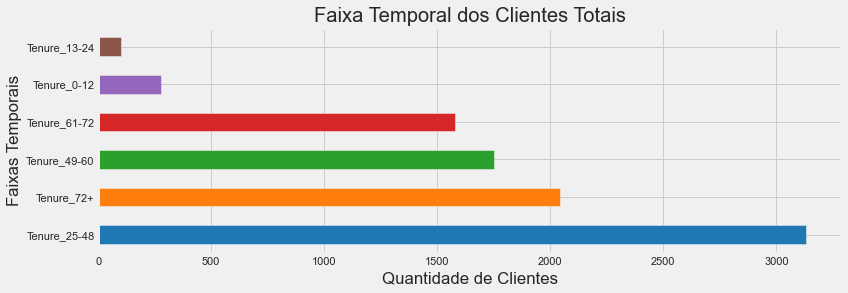

In [737]:
# gerando um gráfico de barras da coluna 'duration_group'

fig, ax = plt.subplots(figsize = (12, 4))
df['duration_group'].value_counts().plot(kind='barh',color=colors)

ax.set_ylabel('Faixas Temporais')
ax.set_xlabel('Quantidade de Clientes')
plt.tight_layout()
ax.set_title('')
plt.title('Faixa Temporal dos Clientes Totais')

##### Verificando os valores em porcentagem

In [738]:
df['duration_group'].value_counts(normalize=True).round(2)

duration_group
Tenure_25-48    0.35
Tenure_72+      0.23
Tenure_49-60    0.20
Tenure_61-72    0.18
Tenure_0-12     0.03
Tenure_13-24    0.01
Name: proportion, dtype: float64

#### Faixa Temporal dos Clientes que Canceleram

Text(0.5, 1.0, 'Faixa Temporal dos Clientes que Canceleram')

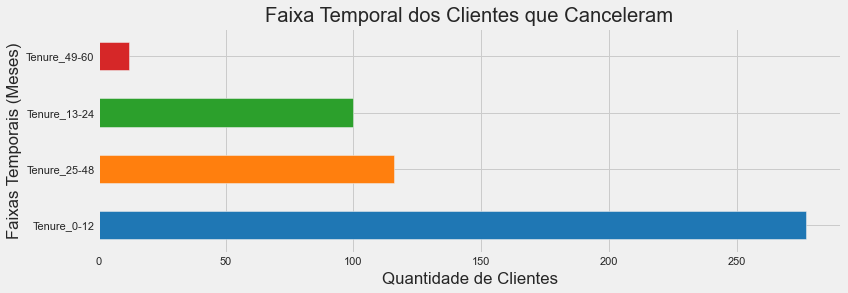

In [739]:
fig, ax = plt.subplots(figsize = (12, 4))
df[df['status'] == 'canceled']['duration_group'].value_counts().plot(kind='barh',color=colors)
ax.set_ylabel('Faixas Temporais (Meses)')
ax.set_xlabel('Quantidade de Clientes')
plt.tight_layout()
ax.set_title('')
plt.title('Faixa Temporal dos Clientes que Canceleram')

##### Verificando os valores em porcentagem

In [740]:
df[df['status'] == 'canceled']['duration_group'].value_counts(normalize=True).round(2)

duration_group
Tenure_0-12     0.55
Tenure_25-48    0.23
Tenure_13-24    0.20
Tenure_49-60    0.02
Name: proportion, dtype: float64

#### Faixa Temporal dos Clientes que estão ativos

Text(0.5, 1.0, 'Faixa Temporal dos Clientes que estão Ativos')

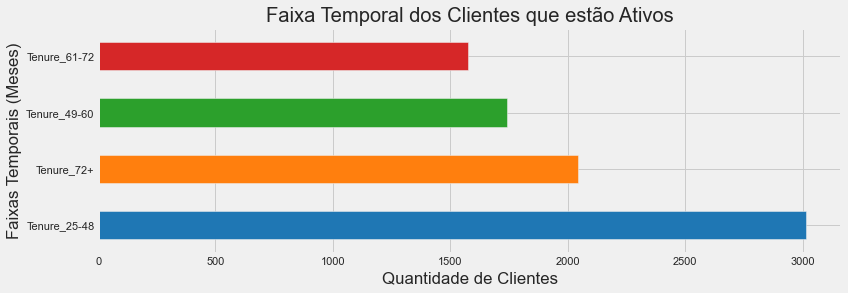

In [741]:
fig, ax = plt.subplots(figsize = (12, 4))
df[df['status'] == 'active']['duration_group'].value_counts().plot(kind='barh',color=colors)

ax.set_ylabel('Faixas Temporais (Meses)')
ax.set_xlabel('Quantidade de Clientes')
plt.tight_layout()
ax.set_title('')
plt.title('Faixa Temporal dos Clientes que estão Ativos')

##### Verificando os valores em porcentagem

In [742]:
df[df['status'] == 'active']['duration_group'].value_counts(normalize=True).round(2)

duration_group
Tenure_25-48    0.36
Tenure_72+      0.24
Tenure_49-60    0.21
Tenure_61-72    0.19
Name: proportion, dtype: float64

In [743]:
df[df['status'] == 'active']['duration_group'].value_counts().round(2)

duration_group
Tenure_25-48    3013
Tenure_72+      2043
Tenure_49-60    1740
Tenure_61-72    1577
Name: count, dtype: int64

#### Quantidade Exata por Cada Grupo

In [744]:
df.stb.freq(['duration_group'], style=True)

,duration_group,count,percent,cumulative_count,cumulative_percent
0,Tenure_25-48,"3,129",35.24%,"3,129",35.24%
1,Tenure_72+,"2,043",23.01%,"5,172",58.26%
2,Tenure_49-60,"1,752",19.73%,"6,924",77.99%
3,Tenure_61-72,"1,577",17.76%,"8,501",95.75%
4,Tenure_0-12,277,3.12%,"8,778",98.87%
5,Tenure_13-24,100,1.13%,"8,878",100.00%


Pela analise acima é possível verificar algumas correlações que contribuem  para as nossas hipóteses:
 - A categoria classificada como `SeniorCitizen` possui maior probabilidade de cancelamento do serviço;
 - Quanto menor o `ternure` maior a probabilidade de cancelamento do serviço

#### Aqui conseguimos observar que mais da metade dos clientes (54.85%) que cancelam nossa assinatura, cancelam entre o período de 1 ano. <br><br> E os clientes com menor probabilidade de cancelamento da assinatura, são os clientes com 4 a 5 anos de assinatura.


#### Correlações

In [745]:
df.dtypes

id                            object
created_at            datetime64[ns]
updated_at            datetime64[ns]
deleted_at            datetime64[ns]
birth_date                    object
status                        object
version                       object
city                          object
state                         object
neighborhood                  object
last_date_purchase    datetime64[ns]
average_ticket               float64
items_quantity                 int64
all_revenue                  float64
all_orders                     int64
recency                        int64
marketing_source              object
churn                         object
duration_months              float64
duration_group                object
dtype: object

In [746]:
df2 = df.select_dtypes(exclude=['object', 'datetime'])

<Figure size 576x360 with 0 Axes>

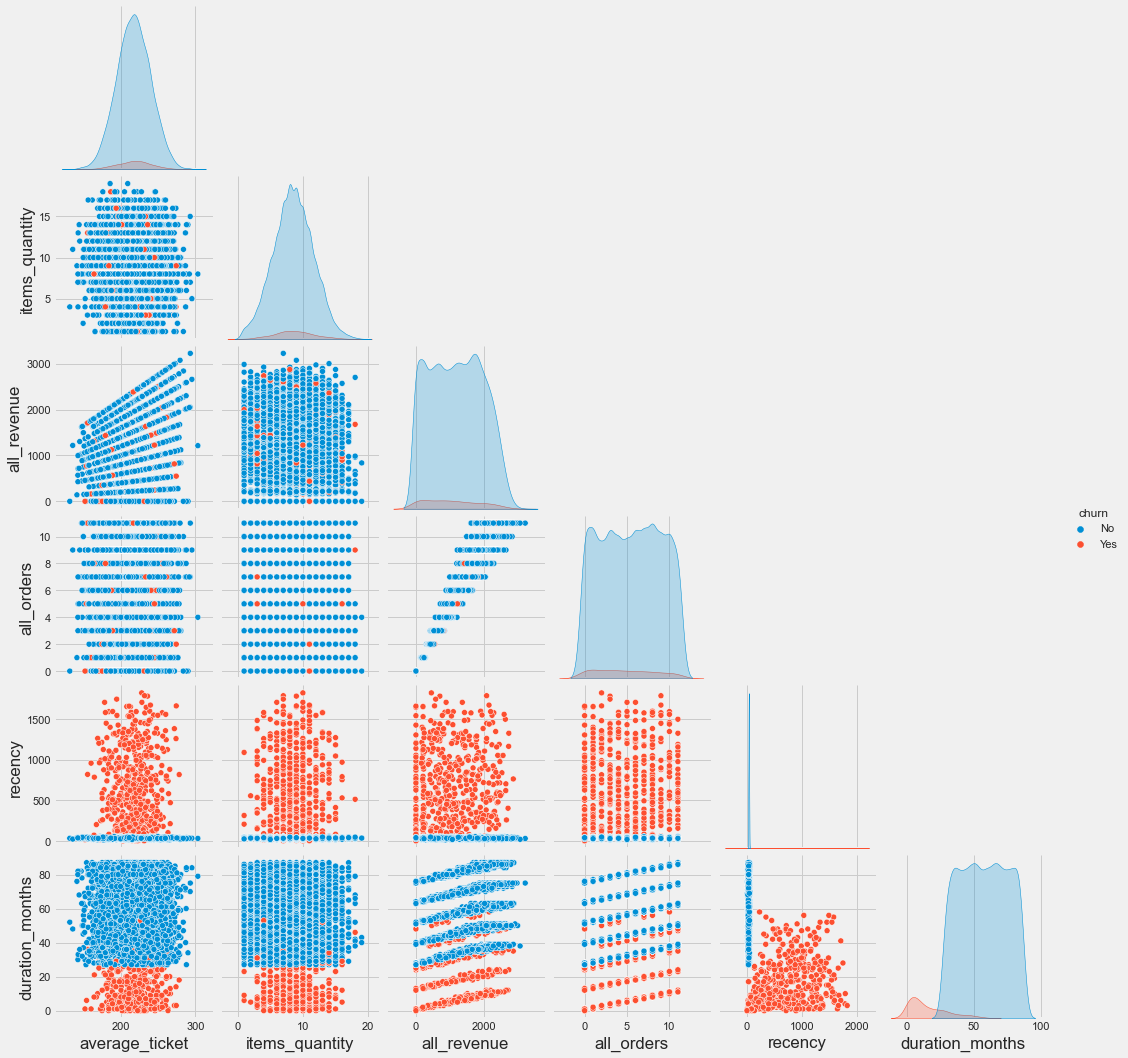

In [747]:
# Pairplot
plt.figure(figsize=(8, 5))
sns.pairplot(data = df, corner = True, hue = 'churn');

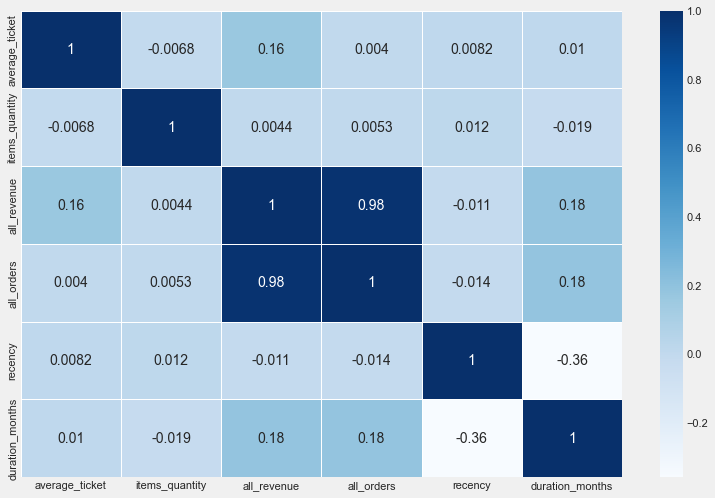

In [748]:
fig, ax = plt.subplots(figsize=(12, 8))

_ = sns.heatmap(df2.corr(), cmap='Blues', linewidth= 0.5, annot = True)

Aqui percebemos uma correlação entre total de pedidos (all_orders) com o total da receita gasta do cliente (all_revenue), o que já era esperado.

#### Cálculos sobre os valores

In [749]:
df.all_revenue.sum()

11748886.031736776

In [750]:
df.average_ticket.mean()

216.89470899663195

In [751]:
df.all_orders.sum()

54154

In [752]:
df.stb.freq(['status'],  style=True)

,status,count,percent,cumulative_count,cumulative_percent
0,active,"8,524",85.24%,"8,524",85.24%
1,paused,971,9.71%,"9,495",94.95%
2,canceled,505,5.05%,"10,000",100.00%


Aqui podemos analisar que **85.24%** dos usuários da nossa base estão **ativos**

#### Analisando as informações estatísticas

In [753]:
df.describe()

,created_at,updated_at,deleted_at,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,duration_months
count,10000,10000,505,10000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,9029.000000
mean,2018-08-12 05:40:22.464000,2020-12-25 06:06:27.533999616,2019-12-02 14:16:21.861385984,2020-12-13 06:09:13.463999488,216.894709,8.49980,1174.888603,5.415400,67.192900,54.788902
min,2016-02-19 10:00:00,2016-05-02 13:46:00,2016-05-02 13:46:00,2016-02-25 03:48:00,131.378672,1.00000,0.000000,0.000000,1.000000,0.000000
25%,2017-05-15 11:42:00,2021-01-10 11:23:00,2019-04-04 11:10:00,2021-01-10 11:23:00,201.398851,6.00000,494.873564,2.000000,31.000000,40.000000
50%,2018-08-09 21:42:00,2021-01-14 11:23:00,2020-04-16 15:38:00,2021-01-14 11:23:00,217.019478,8.00000,1172.751918,5.000000,35.000000,55.000000
75%,2019-11-04 17:18:30,2021-01-18 11:23:00,2020-11-02 21:59:00,2021-01-18 11:23:00,232.455042,11.00000,1798.475045,8.000000,39.000000,71.000000
max,2021-02-18 05:04:00,2021-02-17 22:19:00,2021-02-17 22:19:00,2021-02-16 19:46:00,303.386848,19.00000,3225.654163,11.000000,1820.000000,87.000000
std,NaN,NaN,NaN,NaN,22.757213,3.02604,763.141973,3.457577,175.723276,19.558965


average_ticket         Axes(0.08,0.07;0.124286x0.81)
items_quantity     Axes(0.229143,0.07;0.124286x0.81)
all_revenue        Axes(0.378286,0.07;0.124286x0.81)
all_orders         Axes(0.527429,0.07;0.124286x0.81)
recency            Axes(0.676571,0.07;0.124286x0.81)
duration_months    Axes(0.825714,0.07;0.124286x0.81)
dtype: object

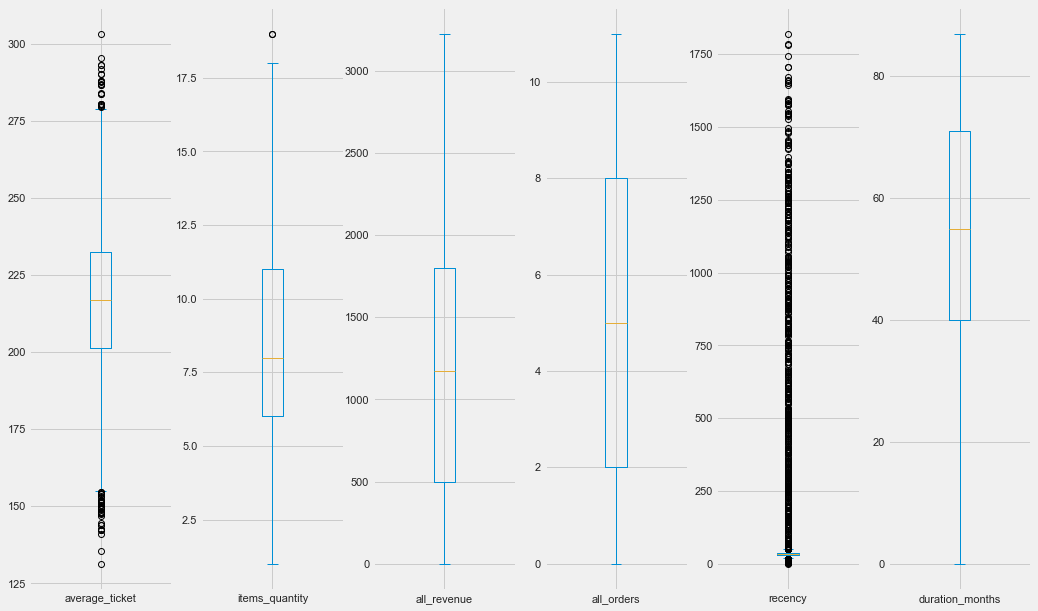

In [754]:
df.plot(kind='box', figsize=(16,10), subplots=True)

#### Entendendo os Outliers

In [755]:
df[df['average_ticket']<= 165.0].head(5)

,id,created_at,updated_at,deleted_at,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source,churn,duration_months,duration_group
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,2017-08-15 07:05:00,2021-01-14 11:23:00,NaT,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:00,151.142942,10,906.857651,6,35,crm,No,69.0,Tenure_61-72
24,e5d227a6-f8ad-41f9-9da3-c91c98dc9f9b,2016-02-23 06:14:00,2021-01-16 11:23:00,NaT,03/29/71 12:00 AM,active,4.33.4,Peixoto,SP,Santa Rita De Cássia,2021-01-16 11:23:00,153.963453,14,1693.597984,11,33,telegram_whatsapp,No,87.0,Tenure_72+
95,76c4ce18-4aae-4adb-865b-1e3439e36d93,2018-09-30 09:16:00,2021-01-11 11:23:00,NaT,11/18/85 12:00 AM,active,3.21.9,Monteiro do Norte,PA,Silveira,2021-01-11 11:23:00,157.895500,12,631.582002,4,38,organic_search,No,56.0,Tenure_49-60
105,68cdc127-465b-4053-8e90-1bdedf5182ef,2019-07-28 10:15:00,2021-01-15 11:23:00,NaT,01/06/86 12:00 AM,active,3.6.6,Mendes do Sul,PB,Tupi A,2021-01-15 11:23:00,162.715590,4,976.293539,6,34,direct,No,46.0,Tenure_25-48
191,fb270a12-bf44-4287-a44a-bd5c3cee01b0,2016-07-16 21:40:00,2021-01-10 11:23:00,NaT,01/17/66 12:00 AM,active,3.37.7,Cunha,PB,Coração Eucarístico,2021-01-10 11:23:00,146.759732,7,1027.318123,7,39,telegram_whatsapp,No,82.0,Tenure_72+


In [756]:
df[df['recency']>= 60].head(5)

,id,created_at,updated_at,deleted_at,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source,churn,duration_months,duration_group
12,9e755f27-01e7-4e2f-aaba-18f733f3e3d9,2016-12-06 20:43:00,2018-06-17 23:59:00,2018-06-17 23:59:00,01/25/66 12:00 AM,canceled,5.31.5,Moreira do Galho,AP,Ipe,2017-07-13 06:36:00,190.017737,9,1140.106424,6,1316,crm,Yes,18.0,Tenure_13-24
22,03718a9c-d9d8-42e9-aae2-3fce5eff9e21,2017-09-21 09:33:00,2018-12-11 04:09:00,2018-12-11 04:09:00,10/18/79 12:00 AM,canceled,2.15.3,Ferreira Alegre,SP,Nossa Senhora De Fátima,2017-11-09 17:40:00,234.207818,11,468.415636,2,1196,organic_search,Yes,15.0,Tenure_13-24
63,5545e738-de0f-4740-b517-cc480aa5bc30,2017-02-06 09:03:00,2020-08-24 09:44:00,2020-08-24 09:44:00,07/28/76 12:00 AM,canceled,4.28.11,Costa Paulista,RS,Tupi A,2017-07-23 11:11:00,211.300132,6,1267.800790,6,1306,organic_search,Yes,42.0,Tenure_25-48
86,ab77fb95-a328-4bdd-869d-a7353f6bb2f3,2020-11-25 08:12:00,2020-12-08 06:45:00,2020-12-08 06:45:00,08/11/49 12:00 AM,canceled,4.32.5,Almeida Alegre,SE,São Jorge 2ª Seção,2020-11-27 21:42:00,214.151632,15,0.000000,0,82,direct,Yes,1.0,Tenure_0-12
118,3dd4e6f2-2289-407c-b9b2-b80e502ac048,2016-10-29 20:10:00,2019-04-14 11:42:00,2019-04-14 11:42:00,06/27/56 12:00 AM,canceled,2.17.14,Martins,GO,Vila Mantiqueira,2017-09-29 19:03:00,227.097547,12,1135.487734,5,1237,direct,Yes,30.0,Tenure_25-48


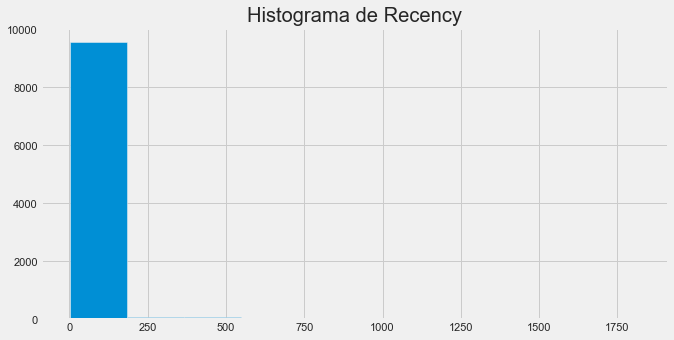

In [757]:
_ = plt.hist(df.recency)
_ = plt.title("Histograma de Recency")

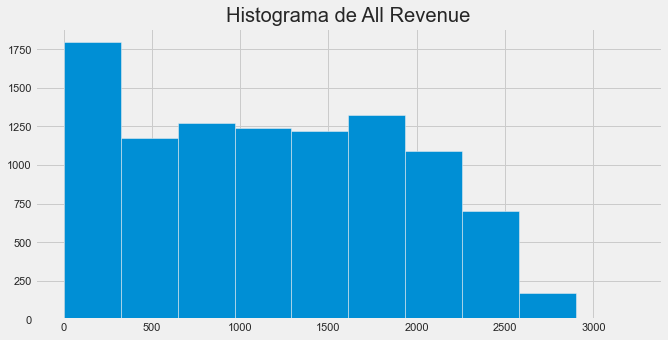

In [758]:
_ = plt.hist(df.all_revenue)
_ = plt.title("Histograma de All Revenue")

In [759]:
df.stb.freq(['status'])

,status,count,percent,cumulative_count,cumulative_percent
0,active,8524,85.24,8524,85.24
1,paused,971,9.71,9495,94.95
2,canceled,505,5.05,10000,100.00


### Frequência das Colunas

#### Gasto por Tipo de Cliente

In [760]:
df.stb.freq(['status'],  value='all_revenue', style=True)

,status,all_revenue,percent,cumulative_all_revenue,cumulative_percent
0,active,"10,060,135",85.63%,"10,060,135",85.63%
1,paused,"1,153,751",9.82%,"11,213,886",95.45%
2,canceled,"535,000",4.55%,"11,748,886",100.00%


In [761]:
df[df['status'] == 'canceled']['all_revenue'].mean().round(2)


1059.41

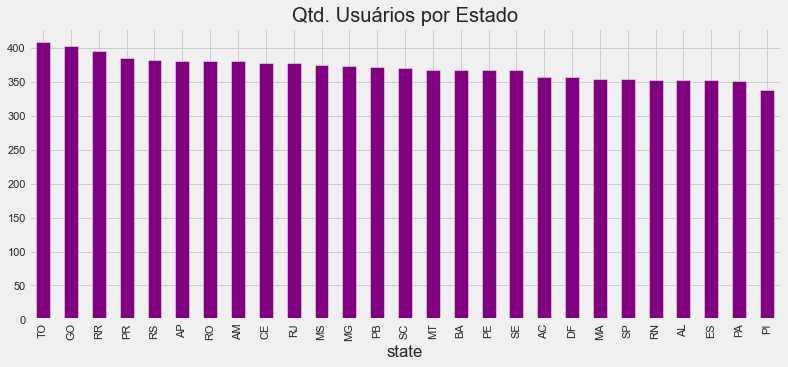

In [762]:
_ = plt.figure(1, figsize=(12, 5))
_ = df["state"].value_counts().plot(kind="bar", color="purple")
_ = plt.title("Qtd. Usuários por Estado")

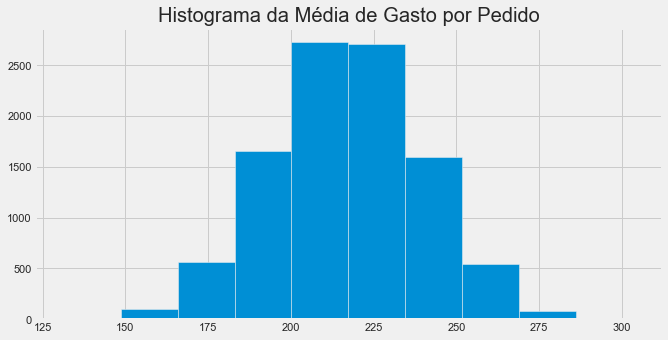

In [763]:
_ = plt.hist(df.average_ticket)
_ = plt.title('Histograma da Média de Gasto por Pedido')

In [764]:
df.state.value_counts(1).round(2)                  

state
TO    0.04
GO    0.04
RR    0.04
PR    0.04
RS    0.04
AP    0.04
RO    0.04
AM    0.04
CE    0.04
RJ    0.04
MS    0.04
MG    0.04
PB    0.04
SC    0.04
MT    0.04
BA    0.04
PE    0.04
SE    0.04
AC    0.04
DF    0.04
MA    0.04
SP    0.04
RN    0.04
AL    0.04
ES    0.04
PA    0.04
PI    0.03
Name: proportion, dtype: float64

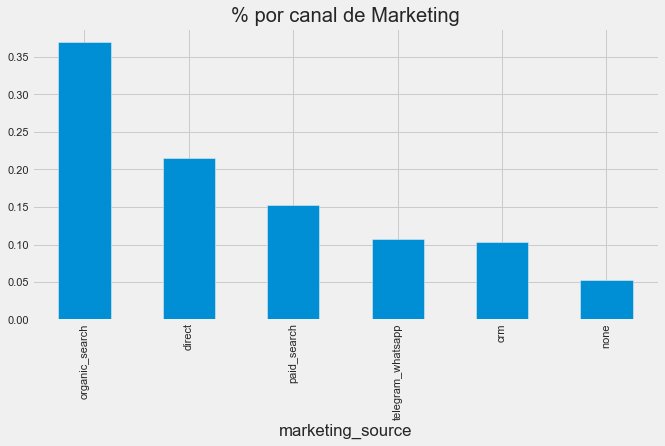

In [765]:
_ = df.marketing_source.value_counts(1).plot.bar()
_ = plt.title('% por canal de Marketing')

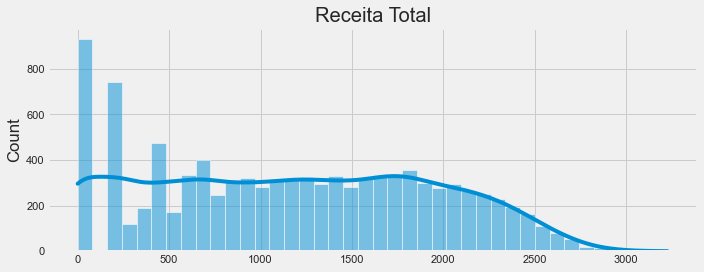

In [766]:
# gerando um gráfico de distribuição para a coluna all_revenue

fig, ax = plt.subplots(figsize = (10, 4))
sns.set_style('dark')
sns.histplot(df['all_revenue'], ax = ax, bins = 40, kde=True)
ax.set_xlabel('')
ax.set_title('Receita Total')
plt.tight_layout()